**Execution:**

* Started: 2018-03-22 14:32:48 GMT
* Ended: 2018-03-22 14:33:04 GMT

**Duration:** 15.4 seconds.

**Autogenerated from:** [scipy-distributions-rv-template.ipynb](in_path)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import seabornextends as snsexts
import faker
from faker import utils
from seabornextends import plots, retouch
from seabornextends.retouch import grid, ax, fig

In [3]:
sns.set_style('whitegrid')
mpl.rcParams['grid.color'] = '0.95'
mpl.rcParams['grid.alpha'] = 0.8
mpl.rcParams['font.family'] = 'Roboto Condensed'

# Develop intuitive understanding of common distributions

## Parameters

In [4]:
# default parameters for this template
# (these are overriden during dynamic notebook execution)
dist_family = 'norm'
kind = 'continuous'

# default shape
default_shape_kws = {'loc': 0, 'scale': 1}

# grid of shapes
shape_grid = {
    'loc': [2, 4, 6],
    'scale': [3, 6, 9]
}

# for plotting
row = 'loc'
col = 'scale'
sharex = True
sharey = True
kde = True

# params for creating evenly spaced probabilities
LO_PROB = 0.001
HI_PROB = 0.999
n_prob_linspace = 1000

# common lo/hi probabilities
lo_p = 0.025
hi_p = 0.975

# list of common probabilities
common_probs = [0.01, 0.025, 0.05, 0.1, 0.4, 0.5, 0.6, 0.9, 0.95, 0.975, 0.99]

In [5]:
# cell inserted during automated execution with new args.
dist_family = 'binom'
kind = 'discrete'
default_shape_kws = {'n': 100, 'p': 0.3}
shape_grid = {'n': [1, 50, 100], 'p': [0.1, 0.5, 0.9]}
row = 'n'
col = 'p'
sharex = False
sharey = False

## Get distribution function from scipy

In [6]:
dist_func = getattr(stats, dist_family)
dist_func

## Compare this distribution in different shapes

Generate random samples from this distribution in different shapes (of size `iters` each):

In [7]:
df = faker.utils.stacked_from_function(func=getattr(dist_func, 'rvs'),
                                       param_grid=shape_grid,
                                       col_names=['random_value'],
                                       iters=10000,
                                       seed=12345)

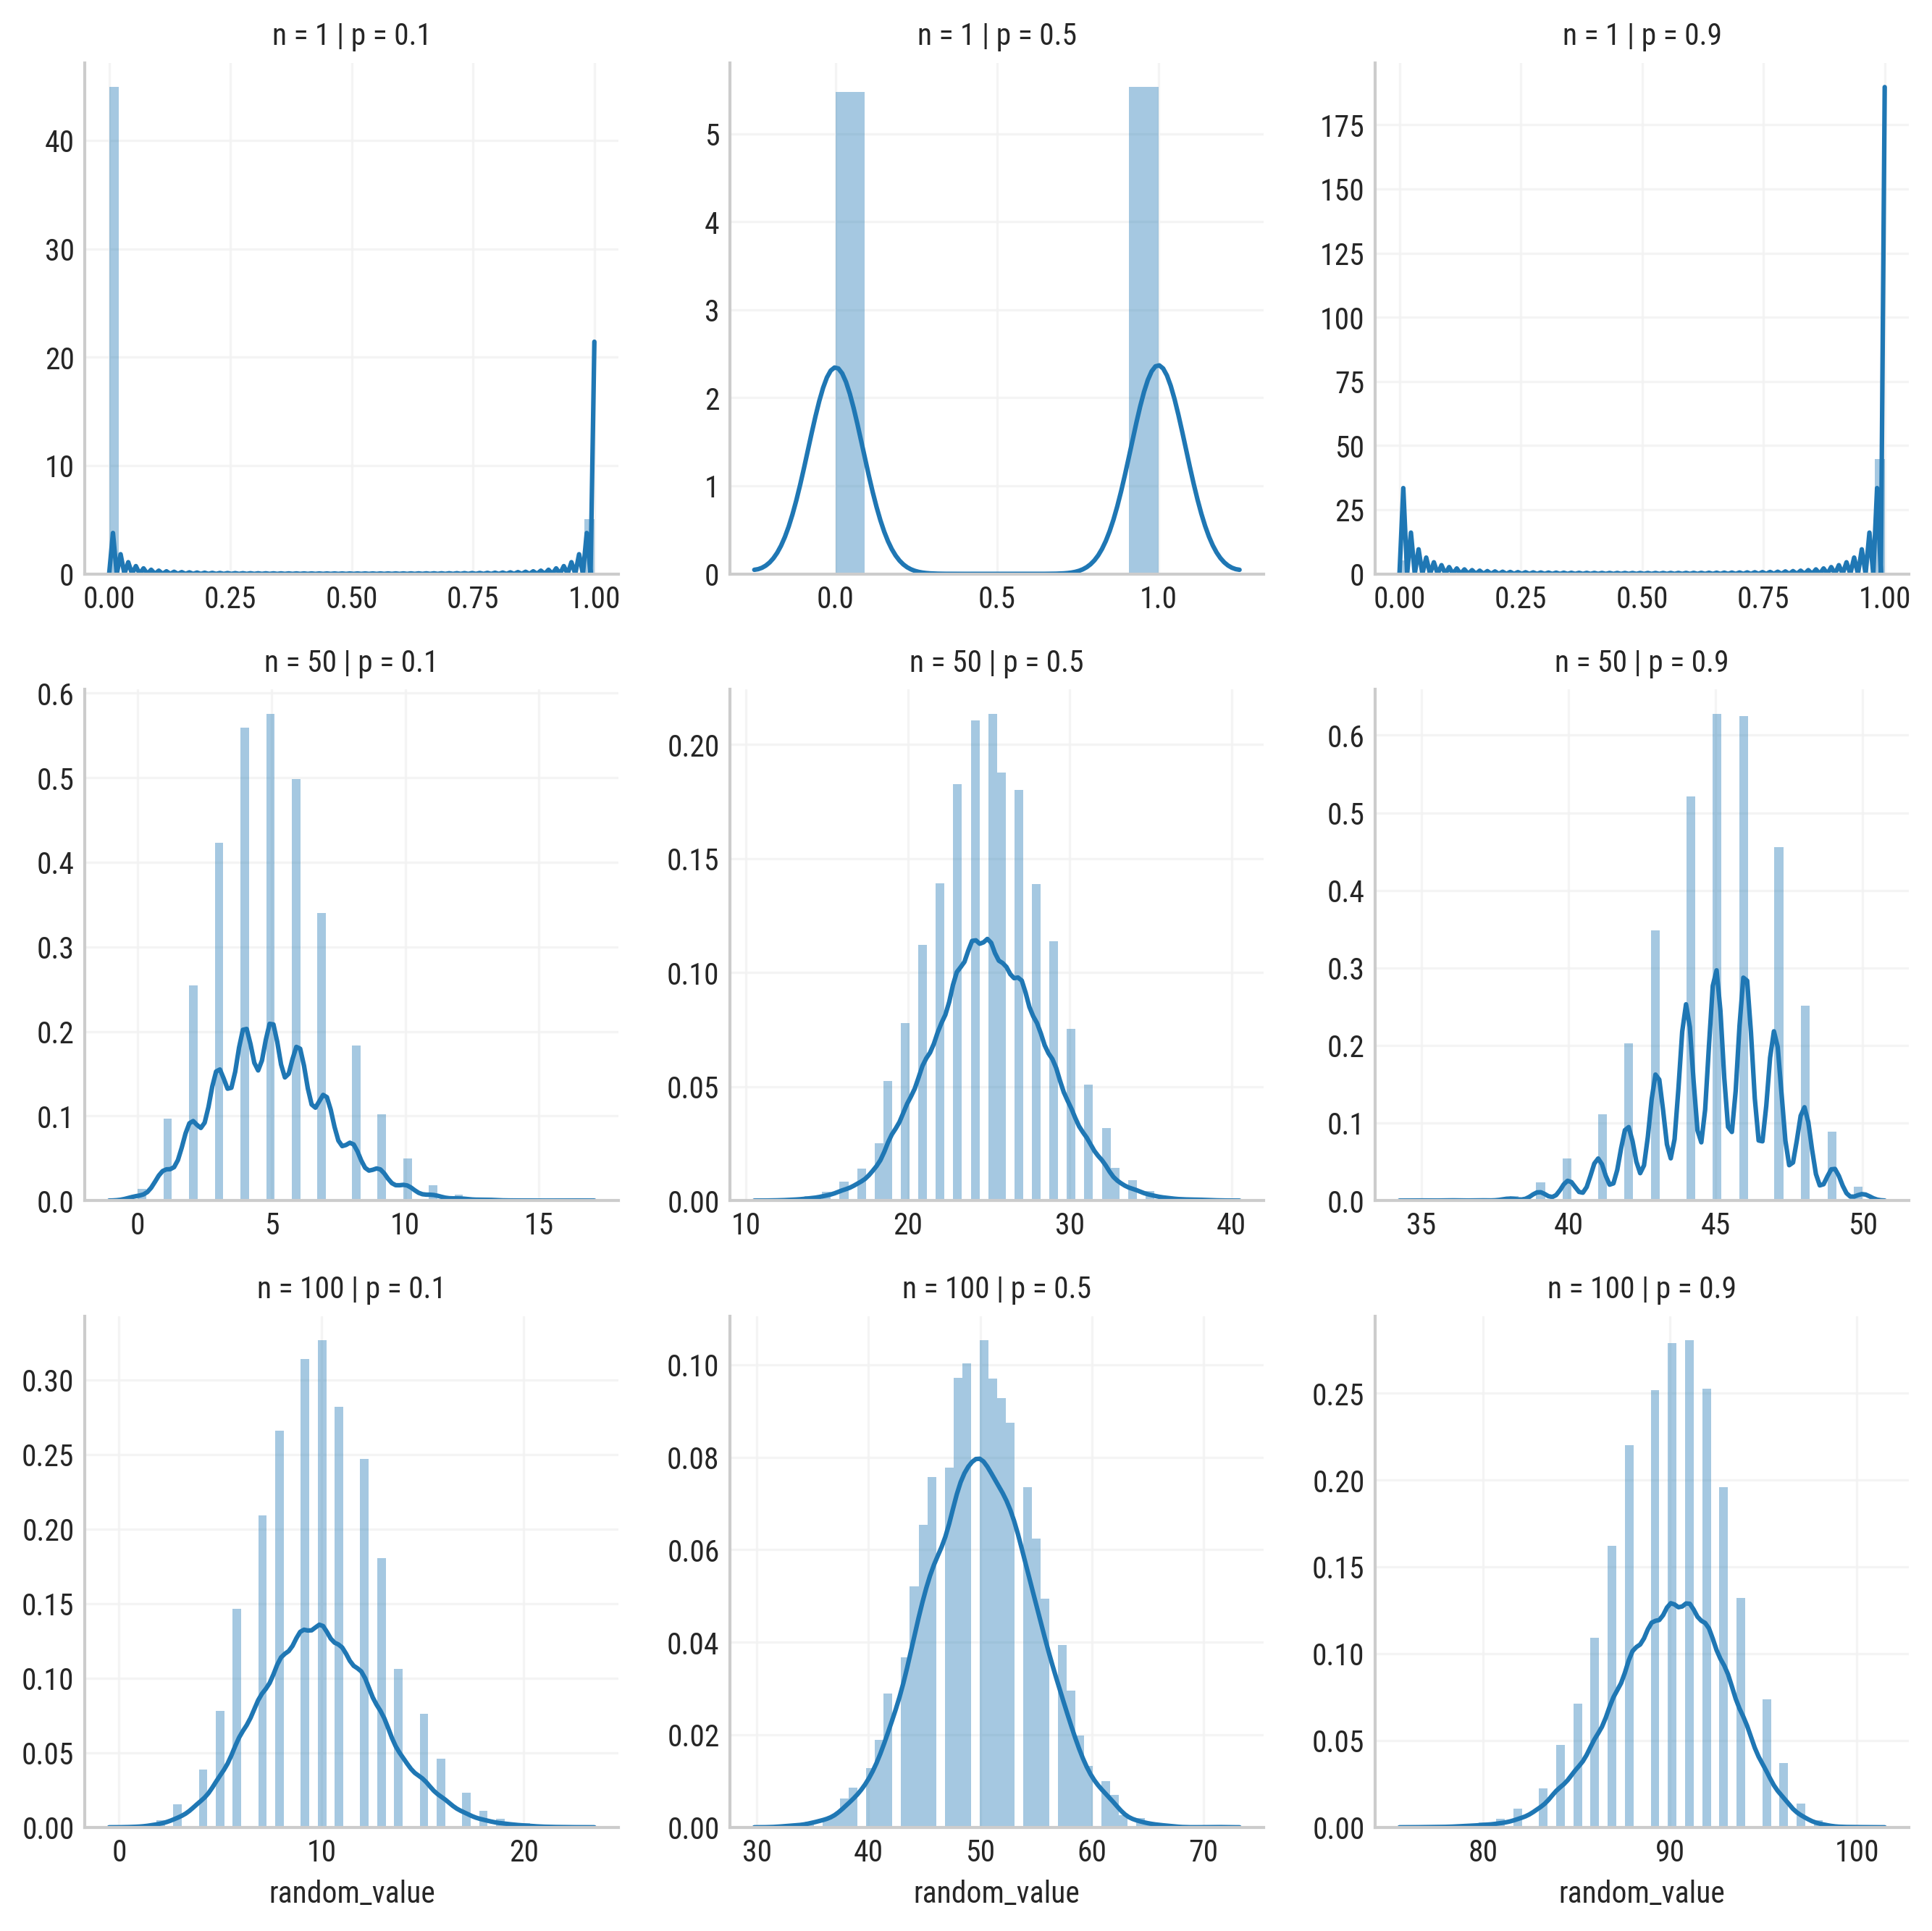

In [8]:
grid = snsexts.plots.distplot(a='random_value',
                              data=df,
                              row=row,
                              col=col,
                              sharex=sharex,
                              sharey=sharey,
                              distplot_kws={'hist': True, 'kde': kde})
retoucher = retouch.grid.FacetGridRetoucher(grid)
retoucher.fig.set_dpi(300)

## Instantiate a distribution

In [9]:
mydist = dist_func(**default_shape_kws)
mydist

In order to make this notebook work for both continuous and discrete distributions
we create a common alias for PDF/PMF.

In [10]:
if kind == 'continuous':
    pf = mydist.pdf
    pfname = 'PDF'
    pfdesc = 'Probability Density Function'
    logpf = mydist.logpdf
    logpfname = 'Log PDF'
    logpfdesc = 'Log Probability Density Function'
    
elif kind == 'discrete':
    pf = mydist.pmf
    pfname = 'PMF'
    pfdesc = 'Probability Mass Function'
    
    logpf = mydist.logpmf
    logpfname = 'Log PMF'
    logpfdesc = 'Log Probability Mass Function'    

Moments:

In [11]:
mean, var, skew, kurt = mydist.stats(moments='mvsk')
print("mean: ", mean)
print("var: ", var)
print("skew: ", skew)
print("kurt: ", kurt)

mean:  30.0
var:  21.0
skew:  0.08728715609439695
kurt:  -0.012380952380952371


### Generate evenly spaced probabilities

Generate a list of evenly spaced probabilities:

In [12]:
prob_linspace = np.linspace(start=LO_PROB, stop=HI_PROB, num=n_prob_linspace)
prob_linspace[0:5], prob_linspace[-5:]

(array([0.001   , 0.001999, 0.002998, 0.003997, 0.004996]),
 array([0.995004, 0.996003, 0.997002, 0.998001, 0.999   ]))

Get _quantiles_ corresponding to probabilities in `prob_linspace`

In [13]:
quantiles = mydist.ppf(prob_linspace)
quantiles[0:5], quantiles[-5:]

(array([17., 17., 18., 18., 19.]), array([42., 42., 43., 44., 45.]))

## Generate random numbers from this distribution

In [14]:
rands = mydist.rvs(size=100000)
rands[0:5]

array([29, 32, 30, 32, 33])

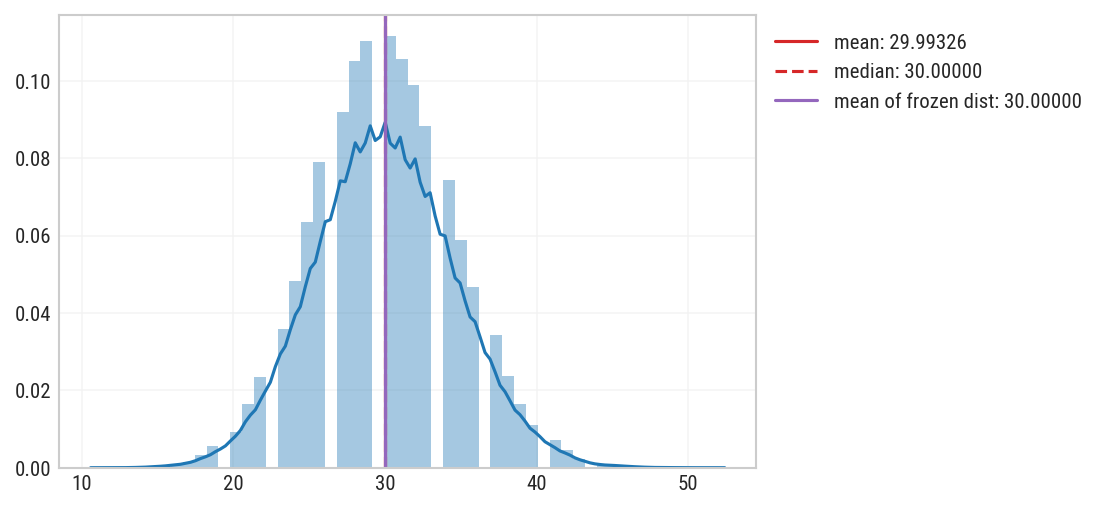

In [15]:
ax = sns.distplot(rands)
ax.axvline(np.mean(rands), label='mean: {0:.5f}'.format(np.mean(rands)), color='C3')
ax.axvline(np.median(rands), label='median: {0:.5f}'.format(np.median(rands)), color='C3', ls='dashed')
ax.axvline(mydist.mean(), label='mean of frozen dist: {0:.5f}'.format(mydist.mean()), color='C4')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.gcf().set_dpi(150)

## Probabilty Density Function / Probability Mass Function

Take a `quantile` as input and return a _point evaluated_ `probability`.

**NOTE**: for normal distribution with mean different to 0 and std different to 1, quantile is a value x (e.g. 1160) _and not_ the standardised version of that value.

To be a **valid pdf/pmf**, a function must satisfy:
* It must be larger than or equal to zero everywhere (a value must be possible).
* The total area under it must be one.

In [16]:
probs = common_probs
for p in probs:
    print("{n} evaluated at quantile {q:.3f} -- which marks {cdf:.3f} CDF probability in distribution -- is {logpf:.3f} (evaluated at that point only).".format(
        q=mydist.ppf(p),
        n=pfname,
        cdf=mydist.cdf(mydist.ppf(p)),
        logpf=pf(mydist.ppf(p))))

PMF evaluated at quantile 20.000 -- which marks 0.016 CDF probability in distribution -- is 0.008 (evaluated at that point only).
PMF evaluated at quantile 21.000 -- which marks 0.029 CDF probability in distribution -- is 0.012 (evaluated at that point only).
PMF evaluated at quantile 23.000 -- which marks 0.076 CDF probability in distribution -- is 0.028 (evaluated at that point only).
PMF evaluated at quantile 24.000 -- which marks 0.114 CDF probability in distribution -- is 0.038 (evaluated at that point only).
PMF evaluated at quantile 29.000 -- which marks 0.462 CDF probability in distribution -- is 0.086 (evaluated at that point only).
PMF evaluated at quantile 30.000 -- which marks 0.549 CDF probability in distribution -- is 0.087 (evaluated at that point only).
PMF evaluated at quantile 31.000 -- which marks 0.633 CDF probability in distribution -- is 0.084 (evaluated at that point only).
PMF evaluated at quantile 36.000 -- which marks 0.920 CDF probability in distribution -- i

We evaluate a list of quantiles and return their **probability density function estimate** (point-estimates only). 

In the standard normal, quantiles at the extremes of the distribution have very low probability while quantiles in the middle of the distribution have very high probability.

In [17]:
estimates = pf(mydist.ppf(prob_linspace))

In [18]:
mydist.ppf(prob_linspace)[0:5], estimates[0:5]

(array([17., 17., 18., 18., 19.]),
 array([0.00119407, 0.00119407, 0.00235971, 0.00235971, 0.00436457]))

In [19]:
mydist.ppf(prob_linspace)[-5:], estimates[-5:]

(array([42., 42., 43., 44., 45.]),
 array([0.00320577, 0.00320577, 0.00185317, 0.00102887, 0.00054873]))

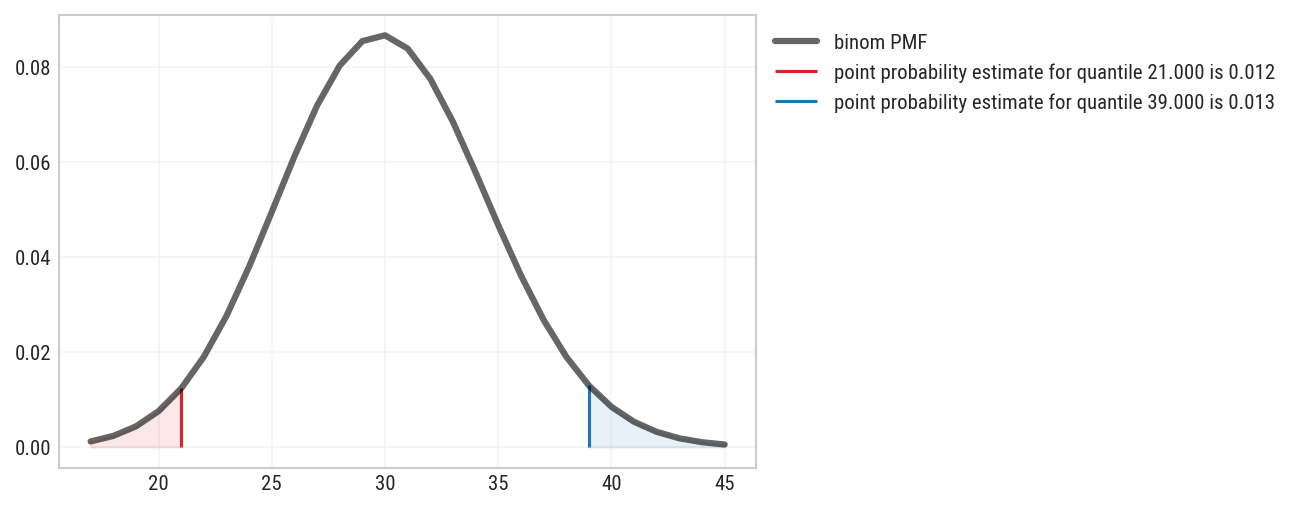

In [20]:
# plot
fig, ax = plt.subplots(1, 1)

# function
ax.plot(mydist.ppf(prob_linspace),
        pf(mydist.ppf(prob_linspace)),
        lw=3,
        alpha=0.6,
        color='black',
        label='{0} {1}'.format(dist_family, pfname))

# lo_p

ax.vlines(x=mydist.ppf(lo_p),
          ymin=0,
          ymax=pf(mydist.ppf(lo_p)),
          colors='C3',
          alpha=1,
          label='point probability estimate for quantile {q:.3f} is {p:.3f}'.format(p=pf(mydist.ppf(lo_p)),
                                                                                    q=mydist.ppf(lo_p)))

ax.fill_between(x=mydist.ppf(prob_linspace[np.where((prob_linspace >= LO_PROB) &
                                                    (prob_linspace <= lo_p))]),
                y1=pf(mydist.ppf(prob_linspace[np.where((prob_linspace >= LO_PROB) &
                                                        (prob_linspace <= lo_p))])),
                color='C3',
                alpha=0.1)

# hi_p
ax.vlines(x=mydist.ppf(hi_p),
          ymin=0,
          ymax=pf(mydist.ppf(hi_p)),
          color='C0',
          alpha=1,
          label='point probability estimate for quantile {q:.3f} is {p:.3f}'.format(p=pf(mydist.ppf(hi_p)),
                                                                                    q=mydist.ppf(hi_p)))


ax.fill_between(x=mydist.ppf(prob_linspace[np.where((prob_linspace >= hi_p) &
                                                    (prob_linspace <= HI_PROB))]),
                y1=pf(mydist.ppf(prob_linspace[np.where((prob_linspace >= hi_p) &
                                                        (prob_linspace <= HI_PROB))])),
                color='C0',
                alpha=0.1)

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.gcf().set_dpi(150)

## Log Probabilty Density Function / Probability Mass Function

In [21]:
probs = common_probs
for p in probs:
    print("{n} evaluated at quantile {q:.3f} -- which marks {cdf:.3f} CDF probability in distribution -- is {logpf:.3f} (evaluated at that point only).".format(
        q=mydist.ppf(p),
        n=logpfname,
        cdf=mydist.cdf(mydist.ppf(p)),
        logpf=logpf(mydist.ppf(p))))

Log PMF evaluated at quantile 20.000 -- which marks 0.016 CDF probability in distribution -- is -4.883 (evaluated at that point only).
Log PMF evaluated at quantile 21.000 -- which marks 0.029 CDF probability in distribution -- is -4.393 (evaluated at that point only).
Log PMF evaluated at quantile 23.000 -- which marks 0.076 CDF probability in distribution -- is -3.588 (evaluated at that point only).
Log PMF evaluated at quantile 24.000 -- which marks 0.114 CDF probability in distribution -- is -3.269 (evaluated at that point only).
Log PMF evaluated at quantile 29.000 -- which marks 0.462 CDF probability in distribution -- is -2.459 (evaluated at that point only).
Log PMF evaluated at quantile 30.000 -- which marks 0.549 CDF probability in distribution -- is -2.444 (evaluated at that point only).
Log PMF evaluated at quantile 31.000 -- which marks 0.633 CDF probability in distribution -- is -2.477 (evaluated at that point only).
Log PMF evaluated at quantile 36.000 -- which marks 0.9

In [22]:
estimates = logpf(mydist.ppf(prob_linspace))

In [23]:
mydist.ppf(prob_linspace)[0:5], estimates[0:5]

(array([17., 17., 18., 18., 19.]),
 array([-6.73038921, -6.73038921, -6.04921822, -6.04921822, -5.43423581]))

In [24]:
mydist.ppf(prob_linspace)[-5:], estimates[-5:]

(array([42., 42., 43., 44., 45.]),
 array([-5.74280179, -5.74280179, -6.29085676, -6.87929298, -7.50790164]))

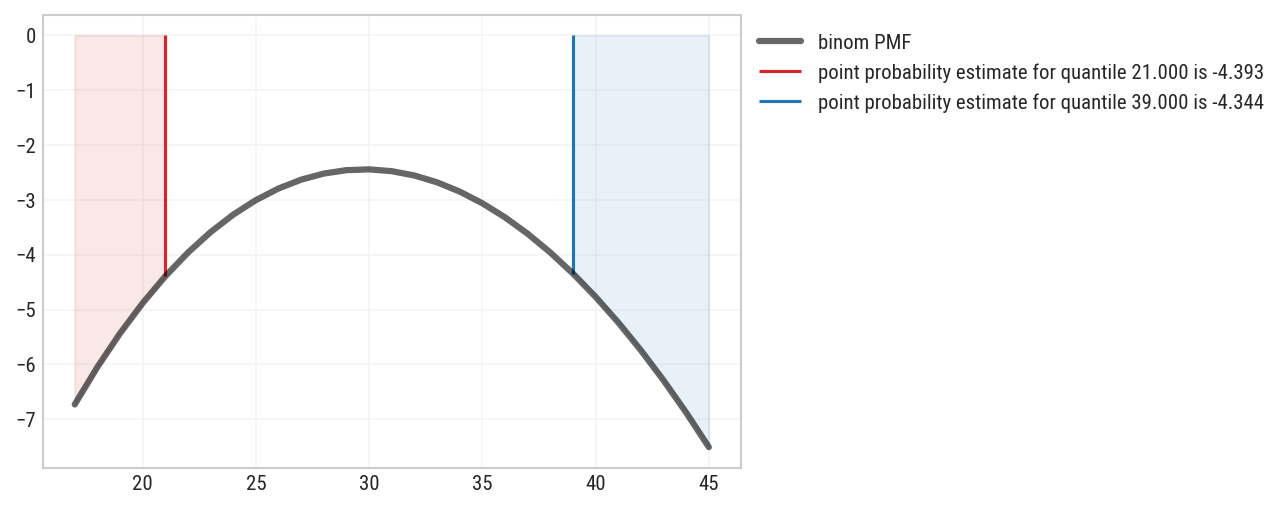

In [25]:
# plot
fig, ax = plt.subplots(1, 1)

# function
ax.plot(mydist.ppf(prob_linspace),
        logpf(mydist.ppf(prob_linspace)),
        lw=3,
        alpha=0.6,
        color='black',
        label='{0} {1}'.format(dist_family, pfname))

# lo_p

ax.vlines(x=mydist.ppf(lo_p),
          ymin=0,
          ymax=logpf(mydist.ppf(lo_p)),
          colors='C3',
          alpha=1,
          label='point probability estimate for quantile {q:.3f} is {p:.3f}'.format(p=logpf(mydist.ppf(lo_p)),
                                                                                    q=mydist.ppf(lo_p)))

ax.fill_between(x=mydist.ppf(prob_linspace[np.where((prob_linspace >= LO_PROB) &
                                                    (prob_linspace <= lo_p))]),
                y1=logpf(mydist.ppf(prob_linspace[np.where((prob_linspace >= LO_PROB) &
                                                        (prob_linspace <= lo_p))])),
                color='C3',
                alpha=0.1)

# hi_p
ax.vlines(x=mydist.ppf(hi_p),
          ymin=0,
          ymax=logpf(mydist.ppf(hi_p)),
          color='C0',
          alpha=1,
          label='point probability estimate for quantile {q:.3f} is {p:.3f}'.format(p=logpf(mydist.ppf(hi_p)),
                                                                                    q=mydist.ppf(hi_p)))


ax.fill_between(x=mydist.ppf(prob_linspace[np.where((prob_linspace >= hi_p) &
                                                    (prob_linspace <= HI_PROB))]),
                y1=logpf(mydist.ppf(prob_linspace[np.where((prob_linspace >= hi_p) &
                                                        (prob_linspace <= HI_PROB))])),
                color='C0',
                alpha=0.1)

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.gcf().set_dpi(150)

## PPF (Percent Point Function or Quantile Function)

Take a _lower tail_ `probability` as input and return a `quantile` (inverse of `CDF`).

It answers questions such as `What is the value below which 97.5% of distribution falls under?`

In [26]:
probs = [0.025, 0.5, 0.975]
for p in probs:
     print("Quantile corresponding to {p} lower tail probability is {q:.3f} ({p:.1%} of values are lower than or equal to {q:.3f})".format(
         p=p,
         q=mydist.ppf(p)))

Quantile corresponding to 0.025 lower tail probability is 21.000 (2.5% of values are lower than or equal to 21.000)
Quantile corresponding to 0.5 lower tail probability is 30.000 (50.0% of values are lower than or equal to 30.000)
Quantile corresponding to 0.975 lower tail probability is 39.000 (97.5% of values are lower than or equal to 39.000)


Calculate quantiles corresponding to list of _lower tail_ probabilities:

In [27]:
estimates = mydist.ppf(prob_linspace)

In [28]:
prob_linspace[0:5], estimates[0:5]

(array([0.001   , 0.001999, 0.002998, 0.003997, 0.004996]),
 array([17., 17., 18., 18., 19.]))

In [29]:
prob_linspace[-5:], estimates[-5:]

(array([0.995004, 0.996003, 0.997002, 0.998001, 0.999   ]),
 array([42., 42., 43., 44., 45.]))

Quantiles of common lower tail probabilities:

In [30]:
probs = common_probs
for p in probs:
     print("Quantile corresponding to {p} lower tail probability is {q:.3f} ({p:.1%} of values are lower than or equal to {q:.3f})".format(
         p=p,
         q=mydist.ppf(p)))

Quantile corresponding to 0.01 lower tail probability is 20.000 (1.0% of values are lower than or equal to 20.000)
Quantile corresponding to 0.025 lower tail probability is 21.000 (2.5% of values are lower than or equal to 21.000)
Quantile corresponding to 0.05 lower tail probability is 23.000 (5.0% of values are lower than or equal to 23.000)
Quantile corresponding to 0.1 lower tail probability is 24.000 (10.0% of values are lower than or equal to 24.000)
Quantile corresponding to 0.4 lower tail probability is 29.000 (40.0% of values are lower than or equal to 29.000)
Quantile corresponding to 0.5 lower tail probability is 30.000 (50.0% of values are lower than or equal to 30.000)
Quantile corresponding to 0.6 lower tail probability is 31.000 (60.0% of values are lower than or equal to 31.000)
Quantile corresponding to 0.9 lower tail probability is 36.000 (90.0% of values are lower than or equal to 36.000)
Quantile corresponding to 0.95 lower tail probability is 38.000 (95.0% of value

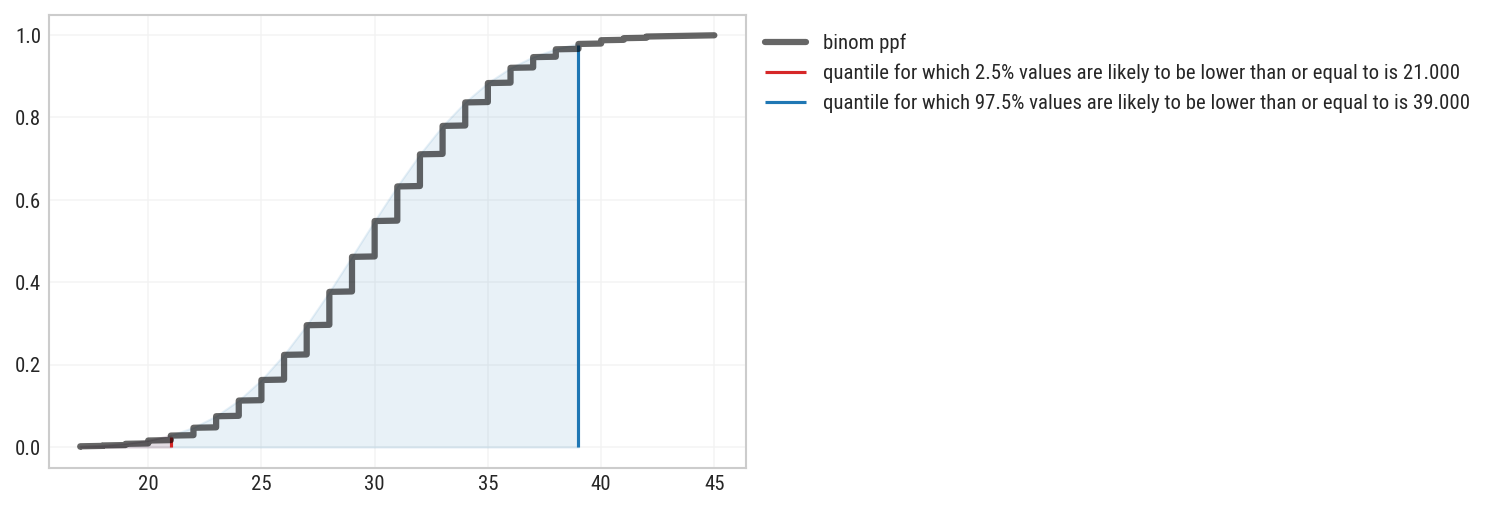

In [31]:
# plot
fig, ax = plt.subplots(1, 1)

# function
ax.plot(mydist.ppf(prob_linspace),
        prob_linspace,
        lw=3,
        alpha=0.6,
        color='black',
        label='{0} ppf'.format(dist_family))

# lo_p
ax.vlines(x=mydist.ppf(lo_p),
          ymin=0,
          ymax=lo_p,
          colors='C3',
          alpha=1,
          label='quantile for which {p:.1%} values are likely to be lower than or equal to is {q:.3f}'.format(
              p=lo_p,
              q=mydist.ppf(lo_p)))




ax.fill_between(x=mydist.ppf(prob_linspace[np.where((prob_linspace >= LO_PROB) &
                                                    (prob_linspace <= lo_p))]),
                y1=mydist.cdf(mydist.ppf(prob_linspace[np.where((prob_linspace >= LO_PROB) &
                                                                (prob_linspace <= lo_p))])),
                color='C3',
                alpha=0.1)

# hi_p
ax.vlines(x=mydist.ppf(hi_p),
          ymin=0,
          ymax=hi_p,
          color='C0',
          alpha=1,
          label='quantile for which {p:.1%} values are likely to be lower than or equal to is {q:.3f}'.format(
              p=hi_p,
              q=mydist.ppf(hi_p)))




ax.fill_between(x=mydist.ppf(prob_linspace[np.where((prob_linspace >= LO_PROB) &
                                                    (prob_linspace <= hi_p))]),
                y1=mydist.cdf(mydist.ppf(prob_linspace[np.where((prob_linspace >= LO_PROB) &
                                                                (prob_linspace <= hi_p))])),
                color='C0',
                alpha=0.1)

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.gcf().set_dpi(150)

## ISF (Inverse Survival Function)

Take an _upper tail_ `probability` as input and returns a `quantile` (inverse of `SF`).

It answers questions such as `What is the value above which 97.5% of distribution falls above?`

In [32]:
probs = [0.025, 0.5, 0.975]
for p in probs:
     print("Quantile corresponding to {p} upper tail probability is {q:.3f} ({p:.1%} of values are greater than {q:.3f})".format(
         p=p,
         q=mydist.isf(p)))

Quantile corresponding to 0.025 upper tail probability is 39.000 (2.5% of values are greater than 39.000)
Quantile corresponding to 0.5 upper tail probability is 30.000 (50.0% of values are greater than 30.000)
Quantile corresponding to 0.975 upper tail probability is 21.000 (97.5% of values are greater than 21.000)


Calculate quantiles corresponding to list of _upper tail_ probabilities:

In [33]:
estimates = mydist.isf(prob_linspace)

In [34]:
prob_linspace[0:5], estimates[0:5]

(array([0.001   , 0.001999, 0.002998, 0.003997, 0.004996]),
 array([45., 44., 43., 42., 42.]))

In [35]:
prob_linspace[-5:], estimates[-5:]

(array([0.995004, 0.996003, 0.997002, 0.998001, 0.999   ]),
 array([19., 18., 18., 17., 17.]))

Quantiles of common upper tail probabilities:

In [36]:
probs = common_probs
for p in probs:
     print("Quantile corresponding to {p} upper tail probability is {q:.3f} ({p:.1%} of values are greater than {q:.3f})".format(
         p=p,
         q=mydist.isf(p)))

Quantile corresponding to 0.01 upper tail probability is 41.000 (1.0% of values are greater than 41.000)
Quantile corresponding to 0.025 upper tail probability is 39.000 (2.5% of values are greater than 39.000)
Quantile corresponding to 0.05 upper tail probability is 38.000 (5.0% of values are greater than 38.000)
Quantile corresponding to 0.1 upper tail probability is 36.000 (10.0% of values are greater than 36.000)
Quantile corresponding to 0.4 upper tail probability is 31.000 (40.0% of values are greater than 31.000)
Quantile corresponding to 0.5 upper tail probability is 30.000 (50.0% of values are greater than 30.000)
Quantile corresponding to 0.6 upper tail probability is 29.000 (60.0% of values are greater than 29.000)
Quantile corresponding to 0.9 upper tail probability is 24.000 (90.0% of values are greater than 24.000)
Quantile corresponding to 0.95 upper tail probability is 23.000 (95.0% of values are greater than 23.000)
Quantile corresponding to 0.975 upper tail probabilit

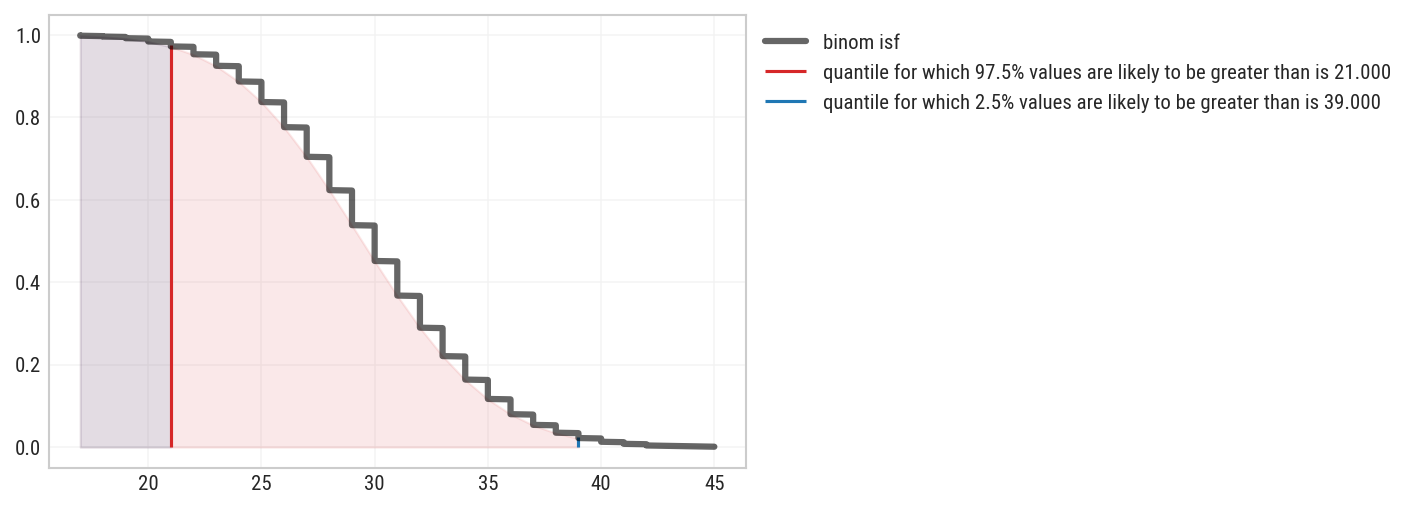

In [37]:
# plot
fig, ax = plt.subplots(1, 1)

# function
ax.plot(mydist.isf(prob_linspace),
        prob_linspace,
        lw=3,
        alpha=0.6,
        color='black',
        label='{0} isf'.format(dist_family))

# hi_p
ax.vlines(x=mydist.isf(hi_p),
          ymin=0,
          ymax=hi_p,
          color='C3',
          alpha=1,
          label='quantile for which {p:.1%} values are likely to be greater than is {q:.3f}'.format(
              p=hi_p,
              q=mydist.isf(hi_p)))


ax.fill_between(x=mydist.ppf(prob_linspace[np.where((prob_linspace >= LO_PROB) &
                                                    (prob_linspace <= hi_p))]),
                y1=mydist.sf(mydist.ppf(prob_linspace[np.where((prob_linspace >= LO_PROB) &
                                                               (prob_linspace <= hi_p))])),
                color='C3',
                alpha=0.1)

# lo_p
ax.vlines(x=mydist.isf(lo_p),
          ymin=0,
          ymax=lo_p,
          colors='C0',
          alpha=1,
          label='quantile for which {p:.1%} values are likely to be greater than is {q:.3f}'.format(
              p=lo_p,
              q=mydist.isf(lo_p)))



ax.fill_between(x=mydist.ppf(prob_linspace[np.where((prob_linspace >= LO_PROB) &
                                                    (prob_linspace <= lo_p))]),
                y1=mydist.sf(mydist.ppf(prob_linspace[np.where((prob_linspace >= LO_PROB) &
                                                               (prob_linspace <= lo_p))])),
                color='C0',
                alpha=0.1)


plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.gcf().set_dpi(150)

## CDF (Cumulative Density Function)

Take a `quantile` as input and return a `probability`.

CDF returns the `probability` that the random variable is *less than or equal to some value* (a `quantile`)

In [38]:
probs = common_probs
for p in probs:
    print("Probability that a random variable is *less or equal than* {q:.3f} quantile is {cdf:.3f}.".format(
        q=mydist.ppf(p),
        cdf=mydist.cdf(mydist.ppf(p))))


Probability that a random variable is *less or equal than* 20.000 quantile is 0.016.
Probability that a random variable is *less or equal than* 21.000 quantile is 0.029.
Probability that a random variable is *less or equal than* 23.000 quantile is 0.076.
Probability that a random variable is *less or equal than* 24.000 quantile is 0.114.
Probability that a random variable is *less or equal than* 29.000 quantile is 0.462.
Probability that a random variable is *less or equal than* 30.000 quantile is 0.549.
Probability that a random variable is *less or equal than* 31.000 quantile is 0.633.
Probability that a random variable is *less or equal than* 36.000 quantile is 0.920.
Probability that a random variable is *less or equal than* 38.000 quantile is 0.966.
Probability that a random variable is *less or equal than* 39.000 quantile is 0.979.
Probability that a random variable is *less or equal than* 41.000 quantile is 0.993.


We evaluate a list of quantiles and return their **cumulative density function** probability. 

In [39]:
estimates = mydist.cdf(mydist.ppf(prob_linspace))

In [40]:
mydist.ppf(prob_linspace)[0:5], estimates[0:5]

(array([17., 17., 18., 18., 19.]),
 array([0.00216293, 0.00216293, 0.00452264, 0.00452264, 0.00888721]))

In [41]:
mydist.ppf(prob_linspace)[-5:], estimates[-5:]

(array([42., 42., 43., 44., 45.]),
 array([0.99603221, 0.99603221, 0.99788538, 0.99891425, 0.99946299]))

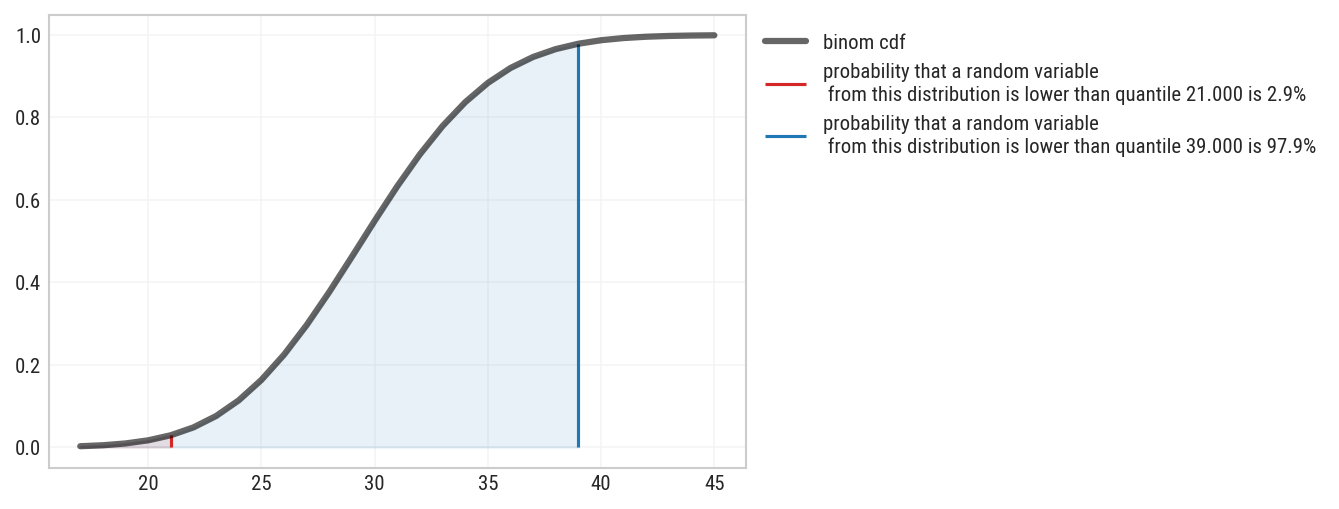

In [42]:
# plot
fig, ax = plt.subplots(1, 1)

# function
ax.plot(mydist.ppf(prob_linspace),
        mydist.cdf(mydist.ppf(prob_linspace)),
        lw=3,
        alpha=0.6,
        color='black',
        label='{0} cdf'.format(dist_family))

# lo_p

ax.vlines(x=mydist.ppf(lo_p),
          ymin=0,
          ymax=mydist.cdf(mydist.ppf(lo_p)),
          colors='C3',
          alpha=1,
          label='probability that a random variable\n from this distribution is lower than quantile {q:.3f} is {p:.1%}'.format(
              p=mydist.cdf(mydist.ppf(lo_p)),
              q=mydist.ppf(lo_p)))



ax.fill_between(x=mydist.ppf(prob_linspace[np.where((prob_linspace >= LO_PROB) &
                                                    (prob_linspace <= lo_p))]),
                y1=mydist.cdf(mydist.ppf(prob_linspace[np.where((prob_linspace >= LO_PROB) &
                                                                (prob_linspace <= lo_p))])),
                color='C3',
                alpha=0.1)

# hi_p
ax.vlines(x=mydist.ppf(hi_p),
          ymin=0,
          ymax=mydist.cdf(mydist.ppf(hi_p)),
          color='C0',
          alpha=1,
          label='probability that a random variable\n from this distribution is lower than quantile {q:.3f} is {p:.1%}'.format(
              p=mydist.cdf(mydist.ppf(hi_p)),
              q=mydist.ppf(hi_p)))



ax.fill_between(x=mydist.ppf(prob_linspace[np.where((prob_linspace >= LO_PROB) &
                                                    (prob_linspace <= hi_p))]),
                y1=mydist.cdf(mydist.ppf(prob_linspace[np.where((prob_linspace >= LO_PROB) &
                                                                (prob_linspace <= hi_p))])),
                color='C0',
                alpha=0.1)

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.gcf().set_dpi(150)

## SF (Survival Function)

Take a `quantile` as input and return a `probability`.

SF returns the `probability` that the random variable is *greater than some value* (a `quantile`)

In [43]:
probs = common_probs
for p in probs:
    print("Probability that a random variable is *greater than* {q:.3f} quantile is {sf:.3f}.".format(
        q=mydist.ppf(p),
        sf=mydist.sf(mydist.ppf(p))))


Probability that a random variable is *greater than* 20.000 quantile is 0.984.
Probability that a random variable is *greater than* 21.000 quantile is 0.971.
Probability that a random variable is *greater than* 23.000 quantile is 0.924.
Probability that a random variable is *greater than* 24.000 quantile is 0.886.
Probability that a random variable is *greater than* 29.000 quantile is 0.538.
Probability that a random variable is *greater than* 30.000 quantile is 0.451.
Probability that a random variable is *greater than* 31.000 quantile is 0.367.
Probability that a random variable is *greater than* 36.000 quantile is 0.080.
Probability that a random variable is *greater than* 38.000 quantile is 0.034.
Probability that a random variable is *greater than* 39.000 quantile is 0.021.
Probability that a random variable is *greater than* 41.000 quantile is 0.007.


We evaluate a list of quantiles and return their **survival function** probability. 

In [44]:
estimates = mydist.sf(mydist.ppf(prob_linspace))

In [45]:
mydist.ppf(prob_linspace)[0:5], estimates[0:5]

(array([17., 17., 18., 18., 19.]),
 array([0.99783707, 0.99783707, 0.99547736, 0.99547736, 0.99111279]))

In [46]:
mydist.ppf(prob_linspace)[-5:], estimates[-5:]

(array([42., 42., 43., 44., 45.]),
 array([0.00396779, 0.00396779, 0.00211462, 0.00108575, 0.00053701]))

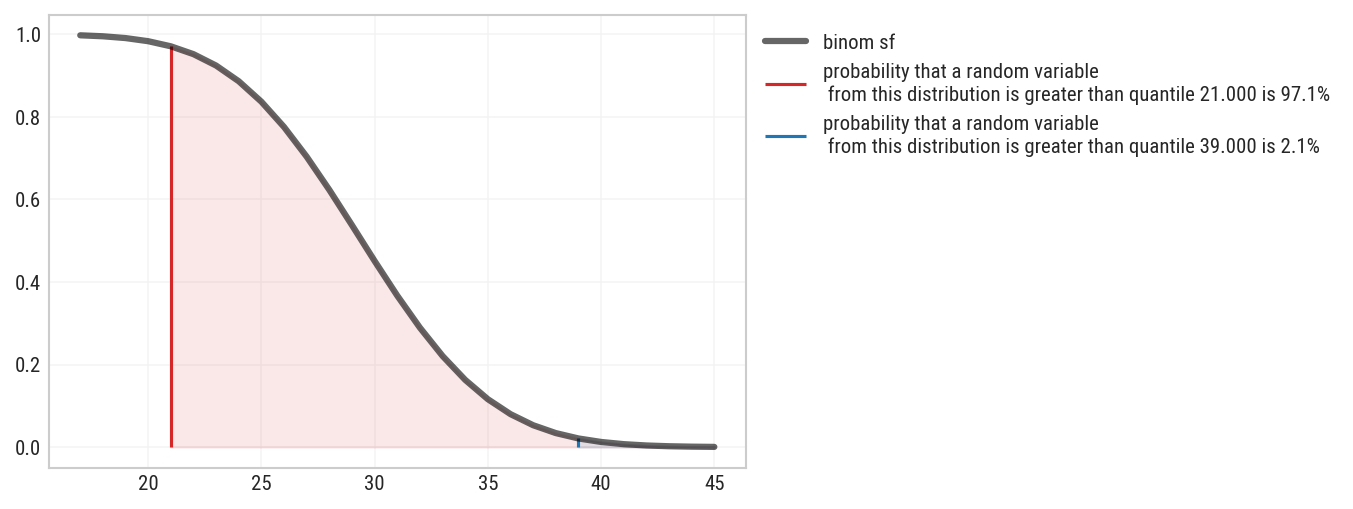

In [47]:
# plot
fig, ax = plt.subplots(1, 1)

# function
ax.plot(mydist.ppf(prob_linspace),
        mydist.sf(mydist.ppf(prob_linspace)),
        lw=3,
        alpha=0.6,
        color='black',
        label='{0} sf'.format(dist_family))

# lo_p

ax.vlines(x=mydist.ppf(lo_p),
          ymin=0,
          ymax=mydist.sf(mydist.ppf(lo_p)),
          colors='C3',
          alpha=1,
          label='probability that a random variable\n from this distribution is greater than quantile {q:.3f} is {p:.1%}'.format(
              p=mydist.sf(mydist.ppf(lo_p)),
              q=mydist.ppf(lo_p)))



ax.fill_between(x=mydist.ppf(prob_linspace[np.where((prob_linspace >= lo_p) &
                                                    (prob_linspace <= HI_PROB))]),
                y1=mydist.sf(mydist.ppf(prob_linspace[np.where((prob_linspace >= lo_p) &
                                                               (prob_linspace <= HI_PROB))])),
                color='C3',
                alpha=0.1)

# hi_p
ax.vlines(x=mydist.ppf(hi_p),
          ymin=0,
          ymax=mydist.sf(mydist.ppf(hi_p)),
          color='C0',
          alpha=1,
          label='probability that a random variable\n from this distribution is greater than quantile {q:.3f} is {p:.1%}'.format(
              p=mydist.sf(mydist.ppf(hi_p)),
              q=mydist.ppf(hi_p)))



ax.fill_between(x=mydist.ppf(prob_linspace[np.where((prob_linspace >= hi_p) &
                                                    (prob_linspace <= HI_PROB))]),
                y1=mydist.sf(mydist.ppf(prob_linspace[np.where((prob_linspace >= hi_p) &
                                                               (prob_linspace <= HI_PROB))])),
                color='C0',
                alpha=0.1)

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.gcf().set_dpi(150)

## Variance of sample means

We treat the sample mean as a random variable in itself which has its own distribution. Central limit theorem shows that the mean of this distribution converges towards the population mean from which we drew the sample as the sample size increases.

In [48]:
n_samples = 1000
sample_size = 16

### Sampling distribution of the mean for a _single_ distribution shape

Draw `n_samples` random samples of size `sample_size`:

In [49]:
data = faker.utils.from_function(func=mydist.rvs,
                                 func_kws={'size': sample_size},
                                 func_seed_arg='random_state',
                                 iters=n_samples)

print("data.shape: ", data.shape)
data[0:2]

data.shape:  (1000, 16)


array([[28, 26, 33, 37, 41, 29, 38, 23, 30, 22, 31, 29, 25, 24, 38, 27],
       [25, 33, 28, 30, 31, 29, 26, 30, 28, 33, 28, 29, 34, 38, 33, 35]])

Calculate the mean for each sample drawn:

In [50]:
sample_means = np.mean(data, axis=1)
print("sample_means.shape: ", sample_means.shape)
sample_means[0:10]

sample_means.shape:  (1000,)


array([30.0625, 30.625 , 29.625 , 31.3125, 30.5   , 30.375 , 30.8125,
       30.1875, 29.5   , 30.    ])

Plot the distribution of sample means

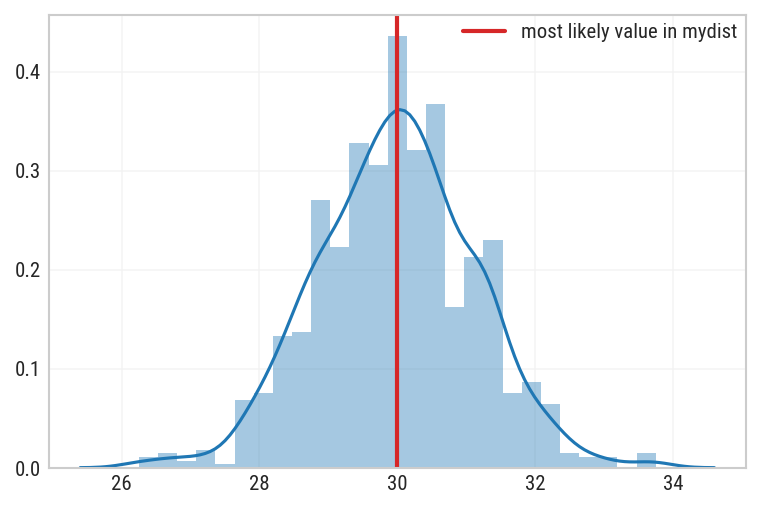

In [51]:
ax = sns.distplot(sample_means)
ax.axvline(mydist.ppf(0.5), color='C3', lw=2, label='most likely value in mydist')
plt.gcf().set_dpi(150)
plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0.0)

### Sampling distribution of the mean for multiple distribution shapes

In [52]:
df = faker.utils.stacked_from_function(
    func=getattr(dist_func, 'rvs'),
    func_seed_arg='random_state',
    apply_func=np.mean,
    param_grid=dict(size=[sample_size], **shape_grid),
    col_names=['sample_mean'],
    iters=n_samples,
    seed=12345)
df.head()

,sample_mean,n,p,size
0,0.2500,1,0.1,16
1,0.0625,1,0.1,16
2,0.0625,1,0.1,16
3,0.2500,1,0.1,16
4,0.1250,1,0.1,16


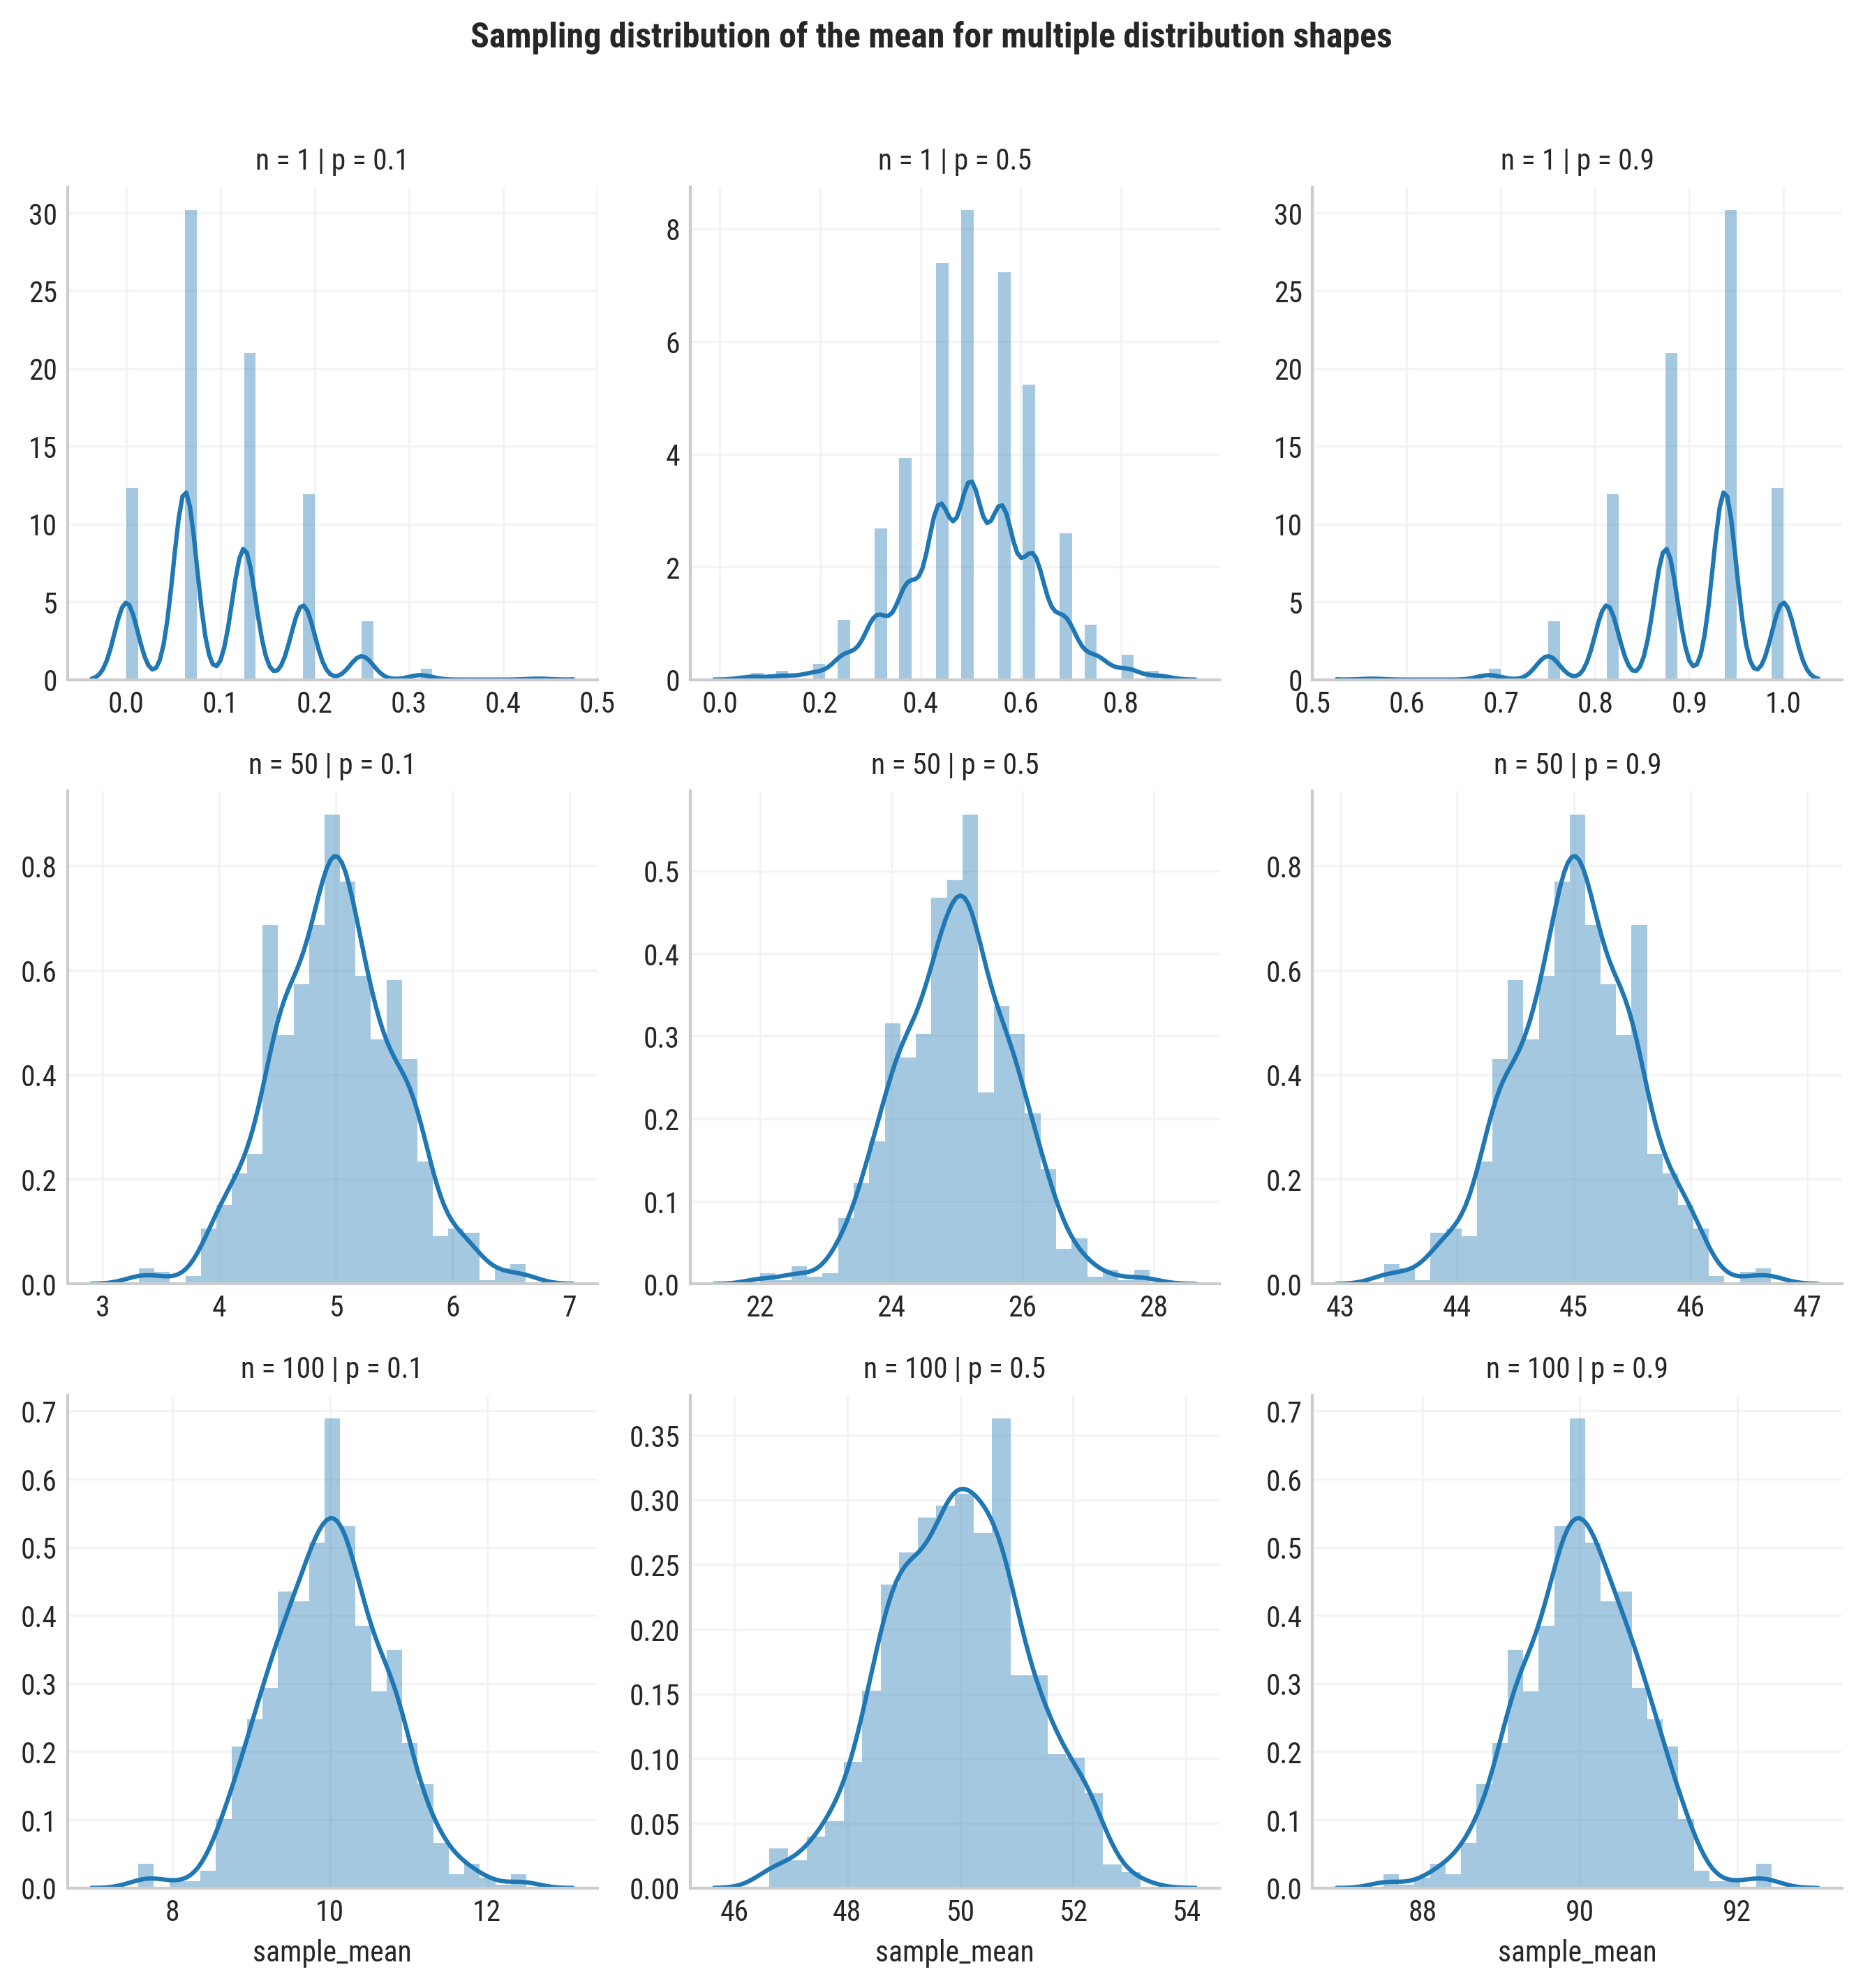

In [53]:
grid = snsexts.plots.distplot(a='sample_mean',
                       data=df,
                       row=row,
                       col=col,
                       sharex=sharex,
                       sharey=sharey,
                       distplot_kws={'hist': True, 'kde': kde})

retoucher = retouch.grid.FacetGridRetoucher(grid)
retoucher.fig.set_dpi(300)
retoucher.fig.set_title(title='Sampling distribution of the mean for multiple distribution shapes', y=1.05)

### Sampling distribution of the mean for a single distribution shape but different sample sizes

In [54]:
df = faker.utils.stacked_from_function(
    func=getattr(dist_func, 'rvs'),
    func_seed_arg='random_state',
    apply_func=np.mean,
    param_grid=dict(size=[10, 30, 100, 300, 500, 1000],
                    **{k: [v] for k, v in default_shape_kws.items()}),
    col_names=['sample_mean'],
    iters=n_samples,
    seed=12345)
df.head()

,sample_mean,n,p,size
0,30.7,100,0.3,10
1,29.3,100,0.3,10
2,29.7,100,0.3,10
3,31.3,100,0.3,10
4,31.0,100,0.3,10


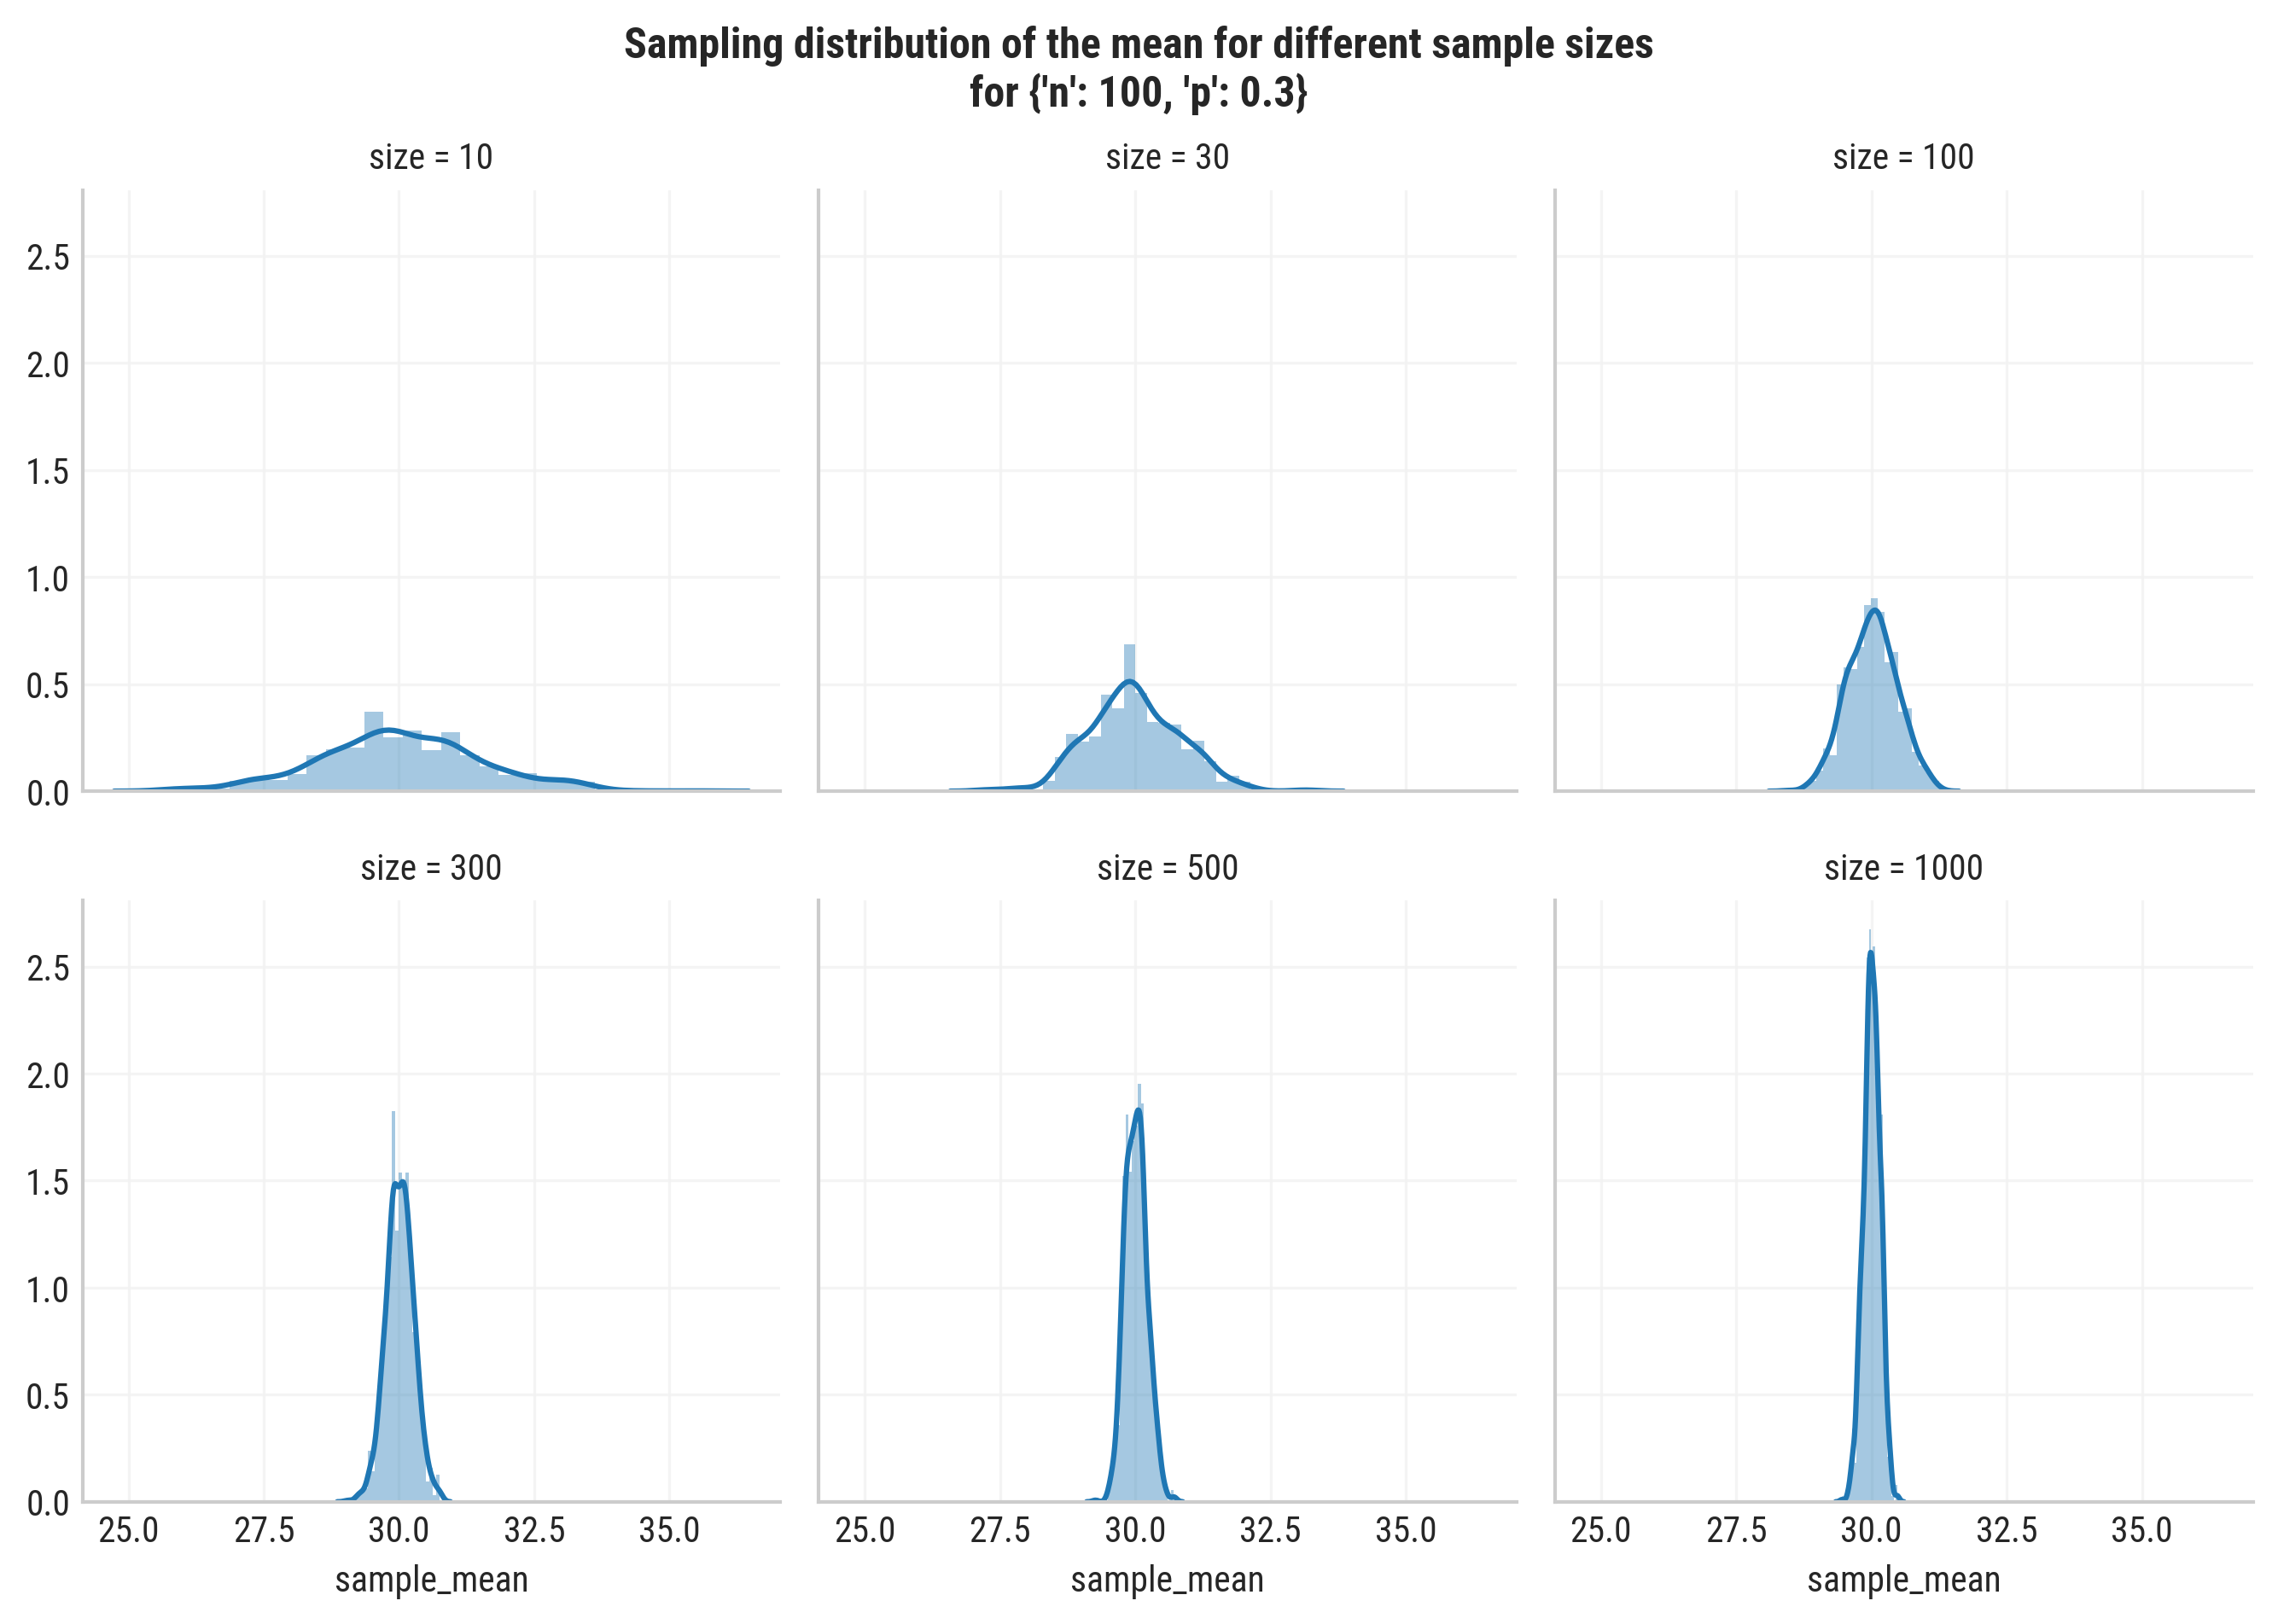

In [55]:
grid = snsexts.plots.distplot(a='sample_mean',
                       data=df,
                       col='size',
                       col_wrap=3,
                       distplot_kws={'hist': True})

retoucher = retouch.grid.FacetGridRetoucher(grid)
retoucher.fig.set_dpi(300)
retoucher.fig.set_title(title='Sampling distribution of the mean for different sample sizes\nfor {}'.format(default_shape_kws), y=1.05)